# King County Housing Linear Regression Project


* Student name: Seyma Tas
* Student pace:  Full time
* Scheduled project review date/time: 05-04-2020
* Instructor name: Amber Yandow
* Blog post URL:


## OSEMN Approach
1 - Obtaining the data 2 - Scrubbing the data 3 - Exploring the data 4 - Modeling the data 5 - iNterpreting the results


![title](picture2.png)


## Questions:

1) What are the main factors to predict the price of a house?

2) How much does a middle income family should invest to buy a standard house?
   
   or What are the properties of a house you can buy in King County if your budget is $400,000???
    
3) How can a middle income family increase the price of their house by %20 by spending %5 of the house cost???

4) Basement
 

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
# # Print all the interactive output without resorting to print
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

## Import the necessary packages

First, we’ll import all of our necessary packages.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

sns.set(style='darkgrid')

In [4]:
# ## Display more information 
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

In [5]:
## Hide the warning boxes
import warnings
warnings.filterwarnings('ignore')

## Import the data set

Next, we’ll import our data and see what we’re working with. 

In [6]:
df=pd.read_csv('kc_house_data.csv')

Lets see what the data looks like by functions head(), tail(), shape(), info() and describe().

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Drop unnecaessary columns

In [8]:
df=df.drop(['id','date'],axis=1)

# Scraping and cleaning data

In [9]:
df.shape

(21597, 19)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 3.1+ MB


### Numerical Data Stored as Strings

In [11]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
915.0         1
4820.0        1
2570.0        1
3500.0        1
1245.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [12]:
df['sqft_basement']=df['sqft_basement'].map(lambda x:float(x.replace('?', '0')))


In [13]:
#Replace 0 with difference between sqft_above and sqft_living
df['sqft_basement'].replace(to_replace='0', value = abs(df['sqft_living']-df['sqft_above']), inplace=True)


In [14]:
df['bedrooms'].replace(to_replace=33, value =3, inplace=True)


In [15]:
df['bedrooms'].value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [16]:
df.describe().round(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,540296.6,3.4,2.1,2080.3,15099.4,1.5,0.0,0.2,3.4,7.7,1788.6,285.7,1971.0,83.6,98078.0,47.6,-122.2,1986.6,12758.3
std,367368.1,0.9,0.8,918.1,41412.6,0.5,0.1,0.8,0.7,1.2,827.8,439.8,29.4,399.9,53.5,0.1,0.1,685.2,27274.4
min,78000.0,1.0,0.5,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,0.0,1900.0,0.0,98001.0,47.2,-122.5,399.0,651.0
25%,322000.0,3.0,1.8,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.5,-122.3,1490.0,5100.0
50%,450000.0,3.0,2.2,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.6,-122.2,1840.0,7620.0
75%,645000.0,4.0,2.5,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,550.0,1997.0,0.0,98118.0,47.7,-122.1,2360.0,10083.0
max,7700000.0,11.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.8,-121.3,6210.0,871200.0


### Buraya describe ile ilgili yorum yaz
Most houses were build around 1975; sold for $450K; had square footage of living spaces around 1910. You can also note, that distributions of price and variables such as sqft_lot are skewed to the upper tail.



## Detecting and Dealing With Null Values

In [17]:
print(df.isna().sum())

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


### Buraya na values  ile ilgili yorum yaz


# waterfront ve view 

In [18]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [19]:
df['view'].isna().sum()

63

In [20]:
feats = ['view', 'waterfront']
df[feats].corr()

,view,waterfront
view,1.000000,0.406654
waterfront,0.406654,1.000000


In [21]:
print('Number missing both:',
      len(df[(df.view.isnull())
      & (df.waterfront.isnull())]))

Number missing both: 6


In [22]:
len(df[(df.view==2)&(df.waterfront.isna())])

121

In [23]:
len(df[(df.view==3)&(df.waterfront>0)])

14

In [24]:
df['view'].fillna(0,inplace=True)

In [25]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [26]:
df['waterfront'].nunique()

2

In [27]:
df['waterfront'].isna().sum()

2376

In [28]:
df['waterfront'].fillna(0,inplace=True)

In [29]:
feats = ['view', 'waterfront']
df[feats].corr()

,view,waterfront
view,1.000000,0.380543
waterfront,0.380543,1.000000


In [30]:
df.yr_renovated.fillna(0, inplace=True)

## Check the distributions

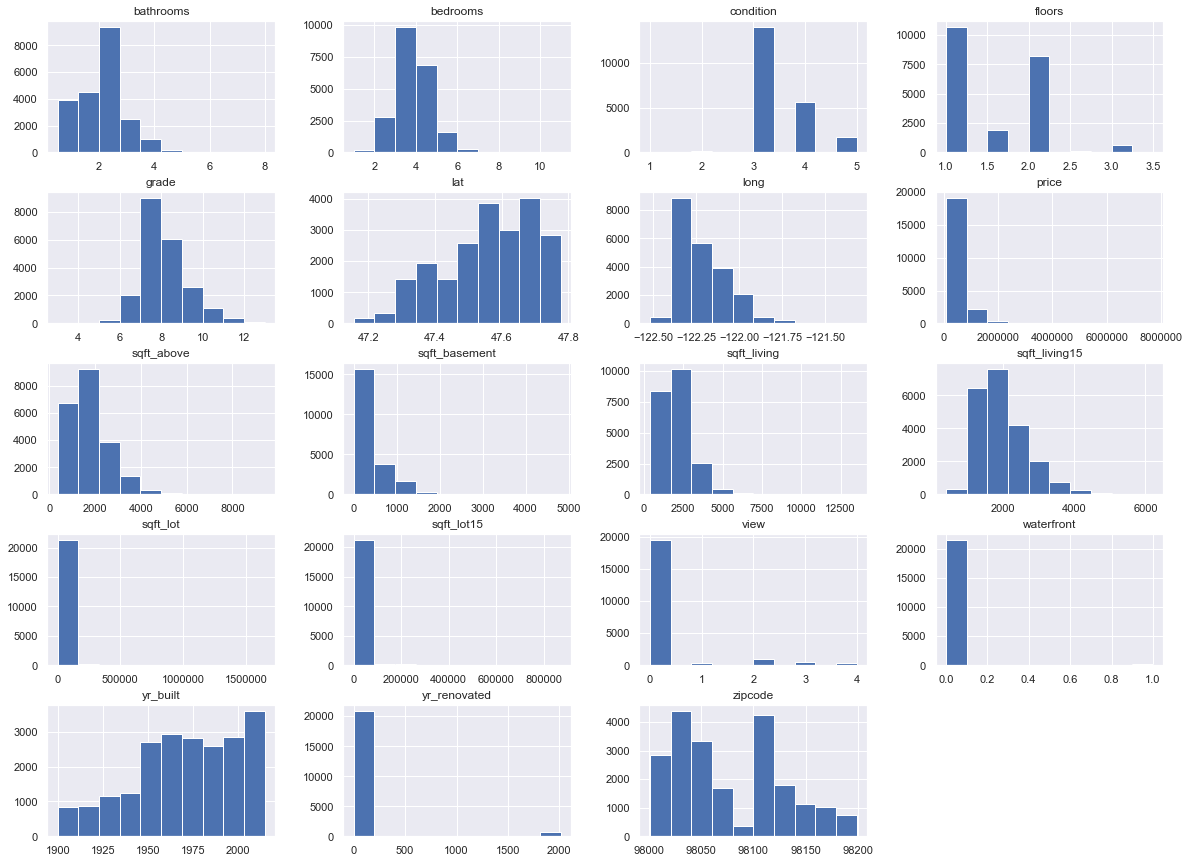

In [31]:
df.hist(figsize=(20,15))
plt.show()


### Outliers

In [32]:
# Q1 = df.quantile(0.001)
# Q3 = df.quantile(0.98)
# IQR = Q3 - Q1

# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

## Log transformation of data

In [33]:
non_normal = ['price','sqft_living', 'sqft_lot','sqft_above','sqft_basement',
              'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log1p(x))
# pd.plotting.scatter_matrix(df[x_cols], figsize=(10,12));

In [34]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309987,3,1.00,7.074117,8.639588,1.0,0.0,0.0,3,7,7.074117,0.000000,7.578657,0.000000,98178,47.5112,-122.257,7.201171,8.639588
1,13.195616,3,2.25,7.852050,8.887791,2.0,0.0,0.0,3,7,7.682943,5.993961,7.576610,7.596894,98125,47.7210,-122.319,7.433075,8.941153
2,12.100718,2,1.00,6.647688,9.210440,1.0,0.0,0.0,3,6,6.647688,0.000000,7.567346,0.000000,98028,47.7379,-122.233,7.908755,8.995041
3,13.311331,4,3.00,7.581210,8.517393,1.0,0.0,0.0,5,7,6.957497,6.814543,7.583756,0.000000,98136,47.5208,-122.393,7.215975,8.517393
4,13.142168,3,2.00,7.427144,8.997271,1.0,0.0,0.0,3,8,7.427144,0.000000,7.594884,0.000000,98074,47.6168,-122.045,7.496097,8.923191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,12.793862,3,2.50,7.333676,7.031741,3.0,0.0,0.0,3,8,7.333676,0.000000,7.605890,0.000000,98103,47.6993,-122.346,7.333676,7.319865
21593,12.899222,4,2.50,7.745436,8.668024,2.0,0.0,0.0,3,8,7.745436,0.000000,7.608374,0.000000,98146,47.5107,-122.362,7.512618,8.881975
21594,12.904461,2,0.75,6.928538,7.208600,2.0,0.0,0.0,3,7,6.928538,0.000000,7.605890,0.000000,98144,47.5944,-122.299,6.928538,7.604894
21595,12.899222,3,2.50,7.378384,7.778630,2.0,0.0,0.0,3,8,7.378384,0.000000,7.603399,0.000000,98027,47.5345,-122.069,7.252054,7.160846


## Normalizing the data

In [35]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['bathrooms', 'sqft_living', 'sqft_lot','sqft_above', 'sqft_basement', 'yr_built','yr_renovated','sqft_living15', 'sqft_lot15']:
    df[feat] = norm_feat(df[feat])


In [36]:
df.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,13.05,3.37,-0.00,0.00,-0.00,1.49,0.01,0.23,3.41,7.66,0.00,-0.00,0.00,0.00,98077.95,47.56,-122.21,0.00,-0.00
std,0.53,0.90,1.00,1.00,1.00,0.54,0.08,0.76,0.65,1.17,1.00,1.00,1.00,1.00,53.51,0.14,0.14,1.00,1.00
min,11.26,1.00,-2.10,-3.86,-3.03,1.00,0.00,0.00,1.00,3.00,-3.47,-0.79,-2.45,-0.19,98001.00,47.16,-122.52,-4.73,-3.05
25%,12.68,3.00,-0.48,-0.67,-0.52,1.00,0.00,0.00,3.00,7.00,-0.73,-0.79,-0.67,-0.19,98033.00,47.47,-122.33,-0.71,-0.52
50%,13.02,3.00,0.17,0.01,-0.06,1.50,0.00,0.00,3.00,7.00,-0.10,-0.79,0.14,-0.19,98065.00,47.57,-122.23,-0.07,-0.03
75%,13.38,4.00,0.50,0.69,0.32,2.00,0.00,0.00,4.00,8.00,0.72,1.21,0.88,-0.19,98118.00,47.68,-122.12,0.69,0.32
max,15.86,11.00,7.65,4.63,5.91,3.50,1.00,4.00,5.00,13.00,4.11,1.90,1.48,5.30,98199.00,47.78,-121.32,3.65,5.81


In [37]:
df.to_csv("king_county_dataset_cleaned.csv", index=False)


## Check the distributions again!

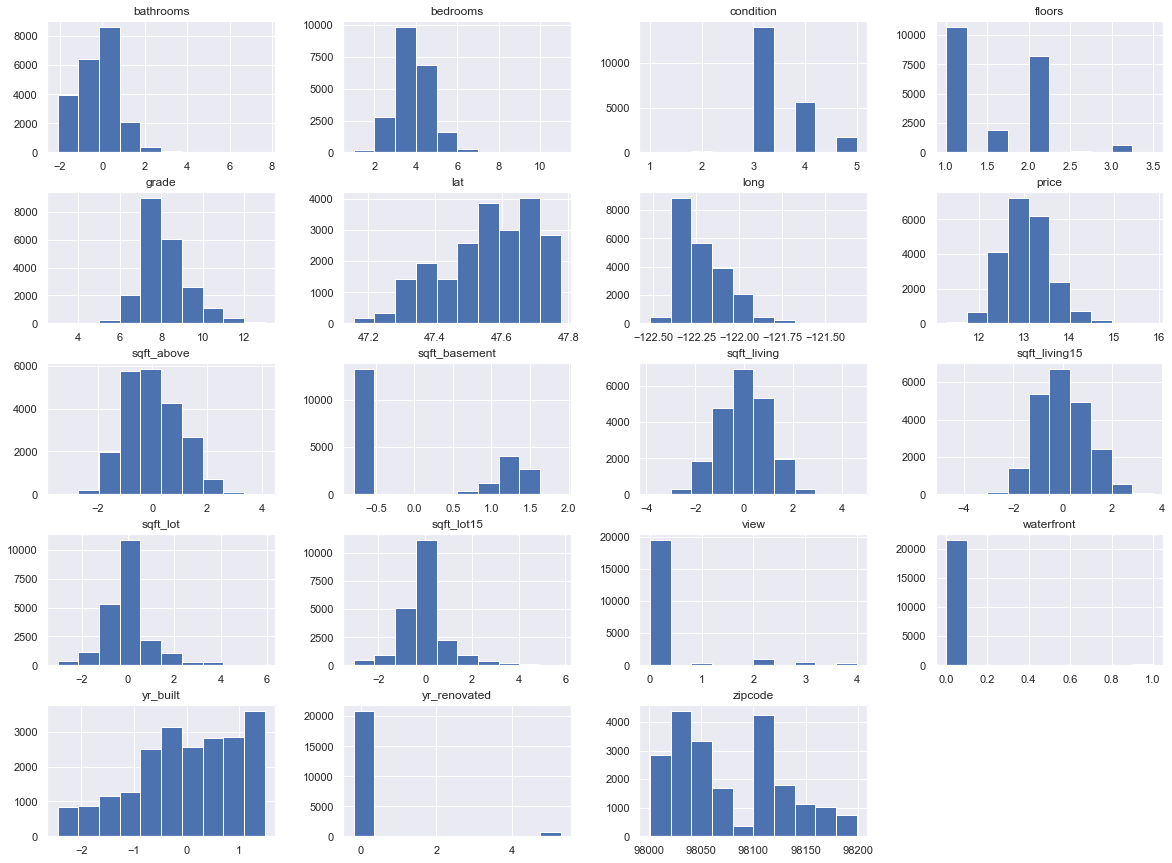

In [38]:
df.hist(figsize=(20,15))
plt.show()

## One-Hot Encoding Categorical Columns


#### Identifying Categorical Variables

These columns can be thought as categorical values. Bedrooms, floors, waterfront, wiev, grade, zipcode and year renovated.
Let's explore them one by one.

In [39]:
df['bedrooms'] = df['bedrooms'].astype('category')
df['floors'] = df['floors'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df['zipcode'] = df['zipcode'].astype('category')

In [40]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [41]:
feats = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15']
df_feats = df[feats]
df_feats_zipcode=df_feats.copy()
df_feats = pd.get_dummies(df_feats, drop_first=True)

In [42]:
df_feats.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=113)

In [43]:
df_feats.head()

,price,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,12.309987,-1.451039,-1.125564,-0.388490,-0.753624,-0.785188,-0.537412,-0.188883,-1.035420,-0.395502,...,0,0,0,0,0,0,1,0,0,0
1,13.195616,0.174482,0.709416,-0.113302,0.672625,1.112322,-0.674329,5.292283,-0.326861,-0.024341,...,0,0,0,0,0,0,0,0,0,0
2,12.100718,-1.451039,-2.131418,0.244426,-1.752585,-0.785188,-1.293945,-0.188883,1.126525,0.041983,...,0,0,0,0,0,0,0,0,0,0
3,13.311331,1.149794,0.070561,-0.523969,-1.026820,1.372094,-0.196342,-0.188883,-0.990188,-0.545897,...,0,0,0,0,0,0,0,0,0,0
4,13.142168,-0.150622,-0.292847,0.008081,0.073385,-0.785188,0.547945,-0.188883,-0.134305,-0.046448,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_feats.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=113)

# Exploring the data

In [45]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309987,3,-1.451039,-1.125564,-0.388490,1.0,0.0,0.0,3,7,-0.753624,-0.785188,-0.537412,-0.188883,98178,47.5112,-122.257,-1.035420,-0.395502
1,13.195616,3,0.174482,0.709416,-0.113302,2.0,0.0,0.0,3,7,0.672625,1.112322,-0.674329,5.292283,98125,47.7210,-122.319,-0.326861,-0.024341
2,12.100718,2,-1.451039,-2.131418,0.244426,1.0,0.0,0.0,3,6,-1.752585,-0.785188,-1.293945,-0.188883,98028,47.7379,-122.233,1.126525,0.041983
3,13.311331,4,1.149794,0.070561,-0.523969,1.0,0.0,0.0,5,7,-1.026820,1.372094,-0.196342,-0.188883,98136,47.5208,-122.393,-0.990188,-0.545897
4,13.142168,3,-0.150622,-0.292847,0.008081,1.0,0.0,0.0,3,8,0.073385,-0.785188,0.547945,-0.188883,98074,47.6168,-122.045,-0.134305,-0.046448


In [46]:
df_feats.head()

,price,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,12.309987,-1.451039,-1.125564,-0.388490,-0.753624,-0.785188,-0.537412,-0.188883,-1.035420,-0.395502,...,0,0,0,0,0,0,1,0,0,0
1,13.195616,0.174482,0.709416,-0.113302,0.672625,1.112322,-0.674329,5.292283,-0.326861,-0.024341,...,0,0,0,0,0,0,0,0,0,0
2,12.100718,-1.451039,-2.131418,0.244426,-1.752585,-0.785188,-1.293945,-0.188883,1.126525,0.041983,...,0,0,0,0,0,0,0,0,0,0
3,13.311331,1.149794,0.070561,-0.523969,-1.026820,1.372094,-0.196342,-0.188883,-0.990188,-0.545897,...,0,0,0,0,0,0,0,0,0,0
4,13.142168,-0.150622,-0.292847,0.008081,0.073385,-0.785188,0.547945,-0.188883,-0.134305,-0.046448,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df_plot=df[['price', 'bedrooms','bathrooms','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode','lat','long','sqft_living15','sqft_lot15']].copy()

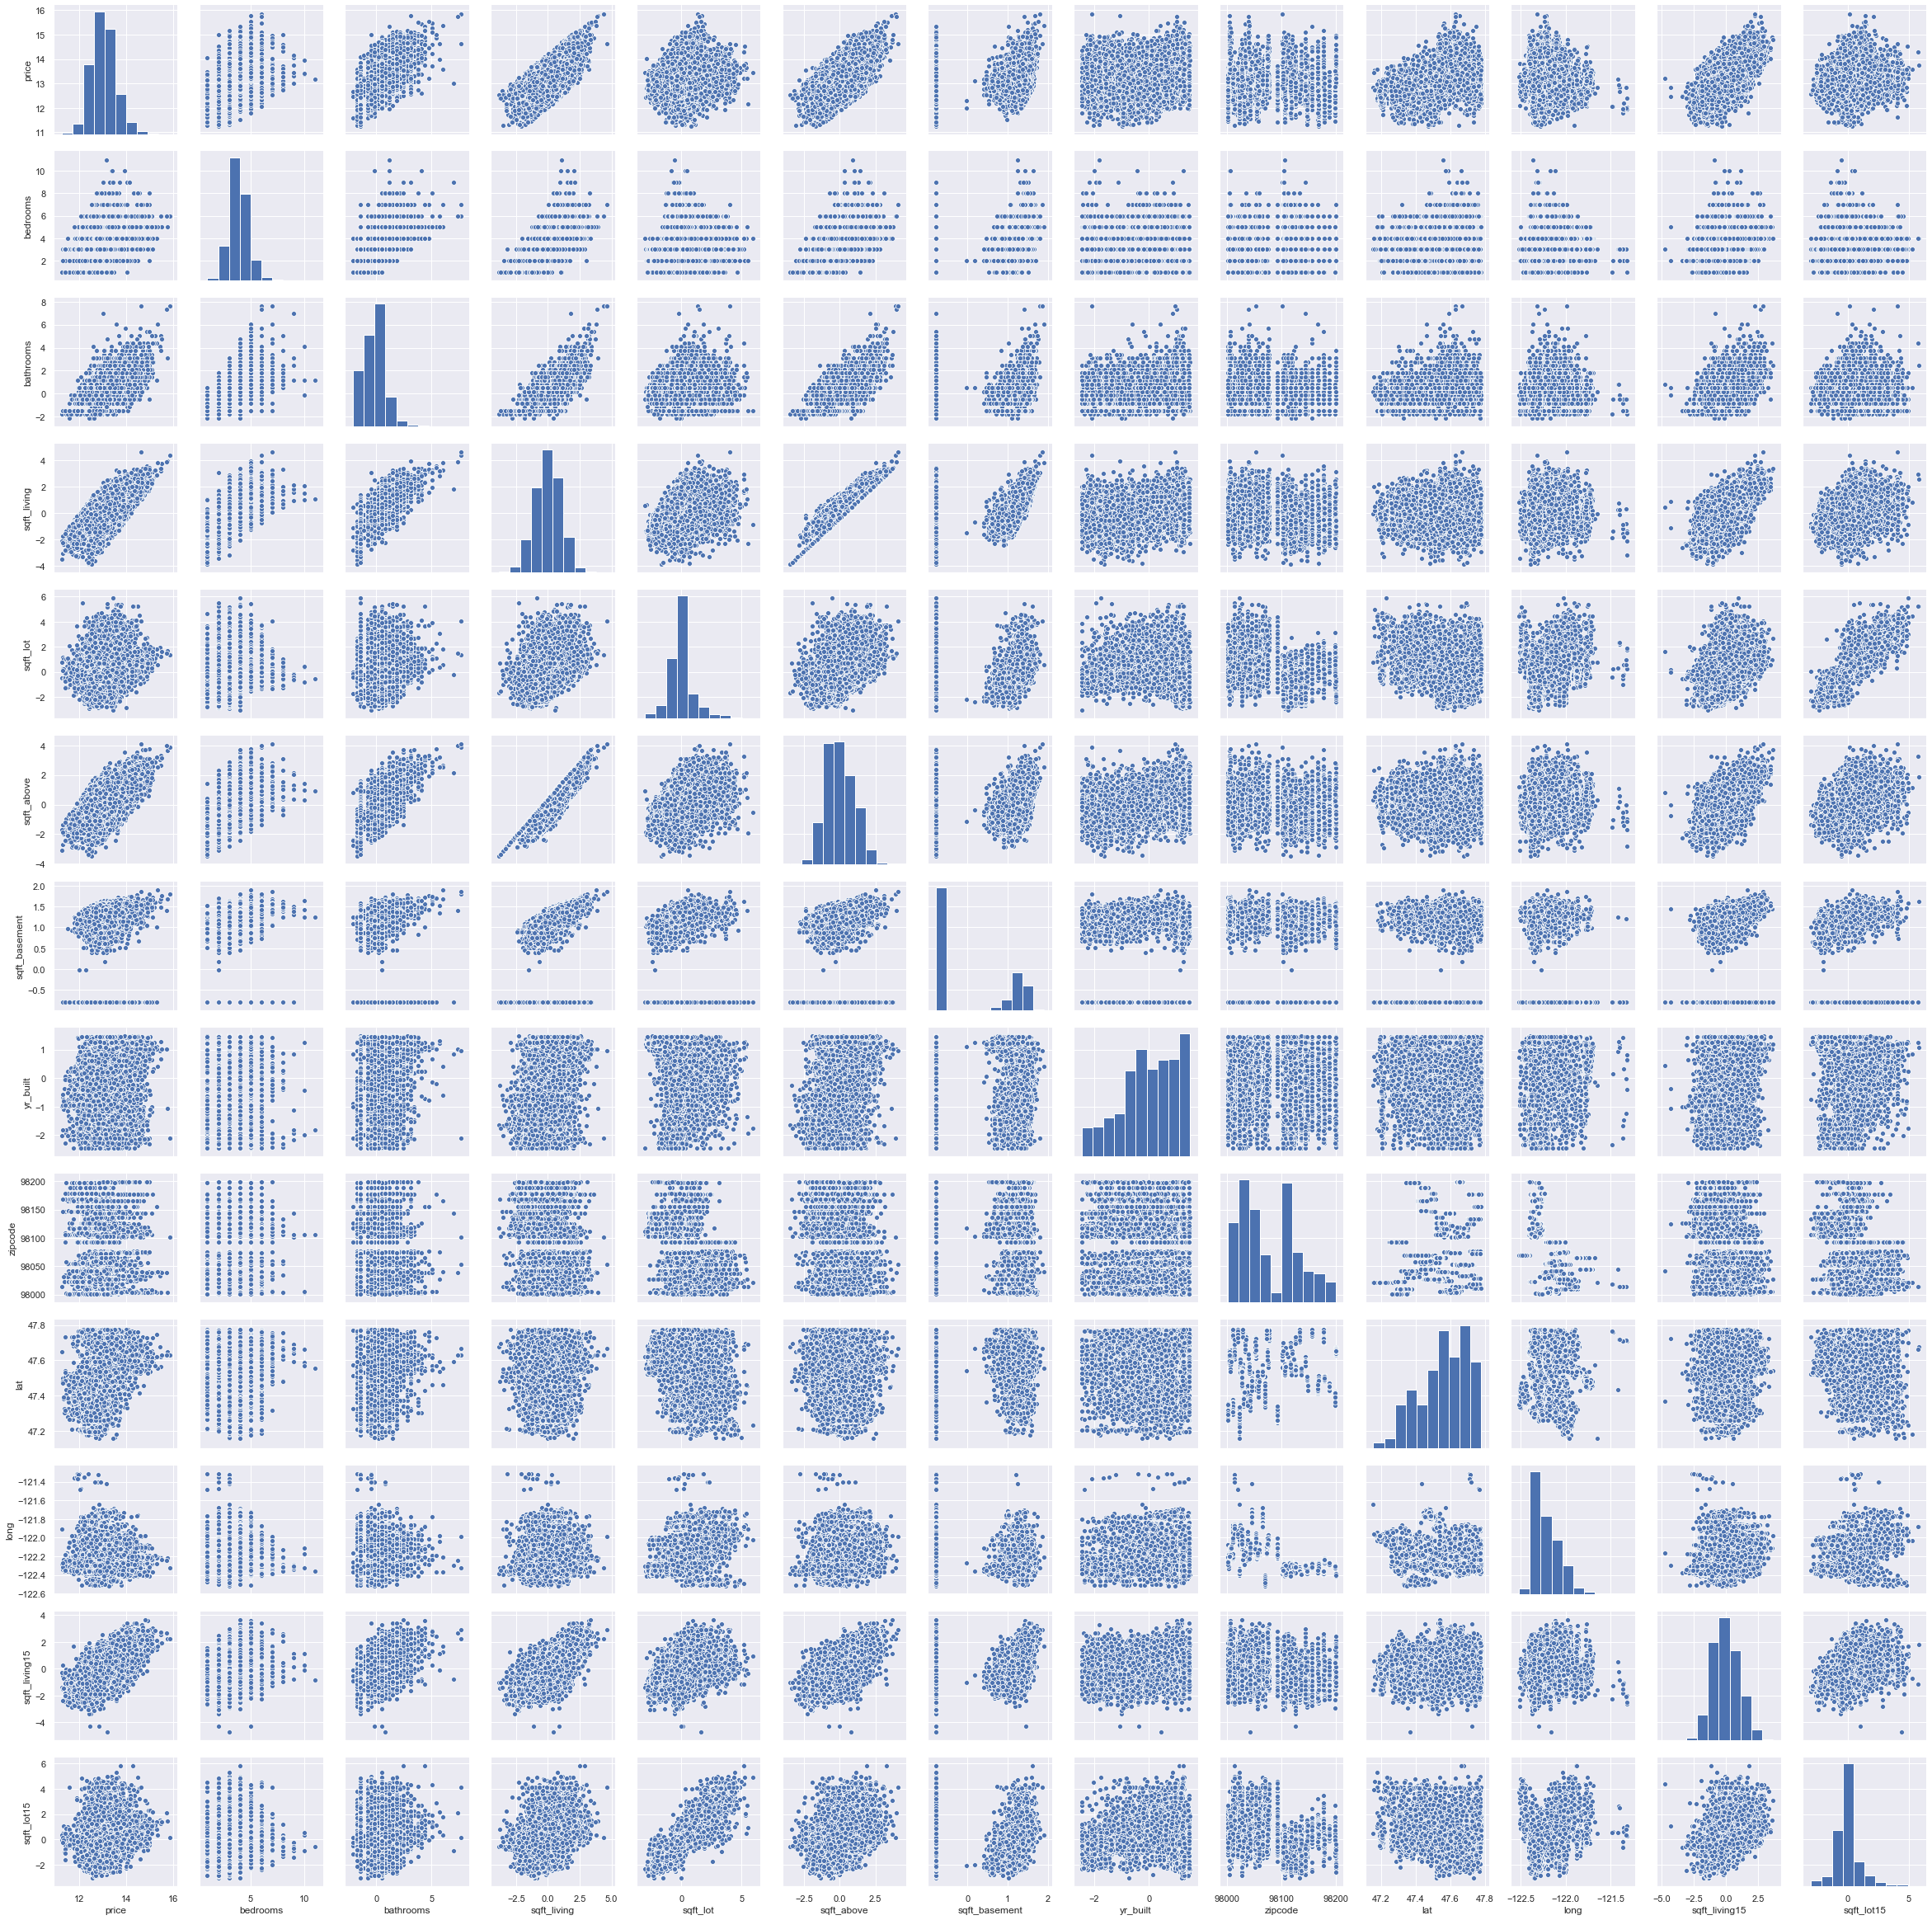

In [48]:
sns.pairplot(df_plot)
plt.show()

## Check for Linearity

jointplots

## Check for Multicollinearity

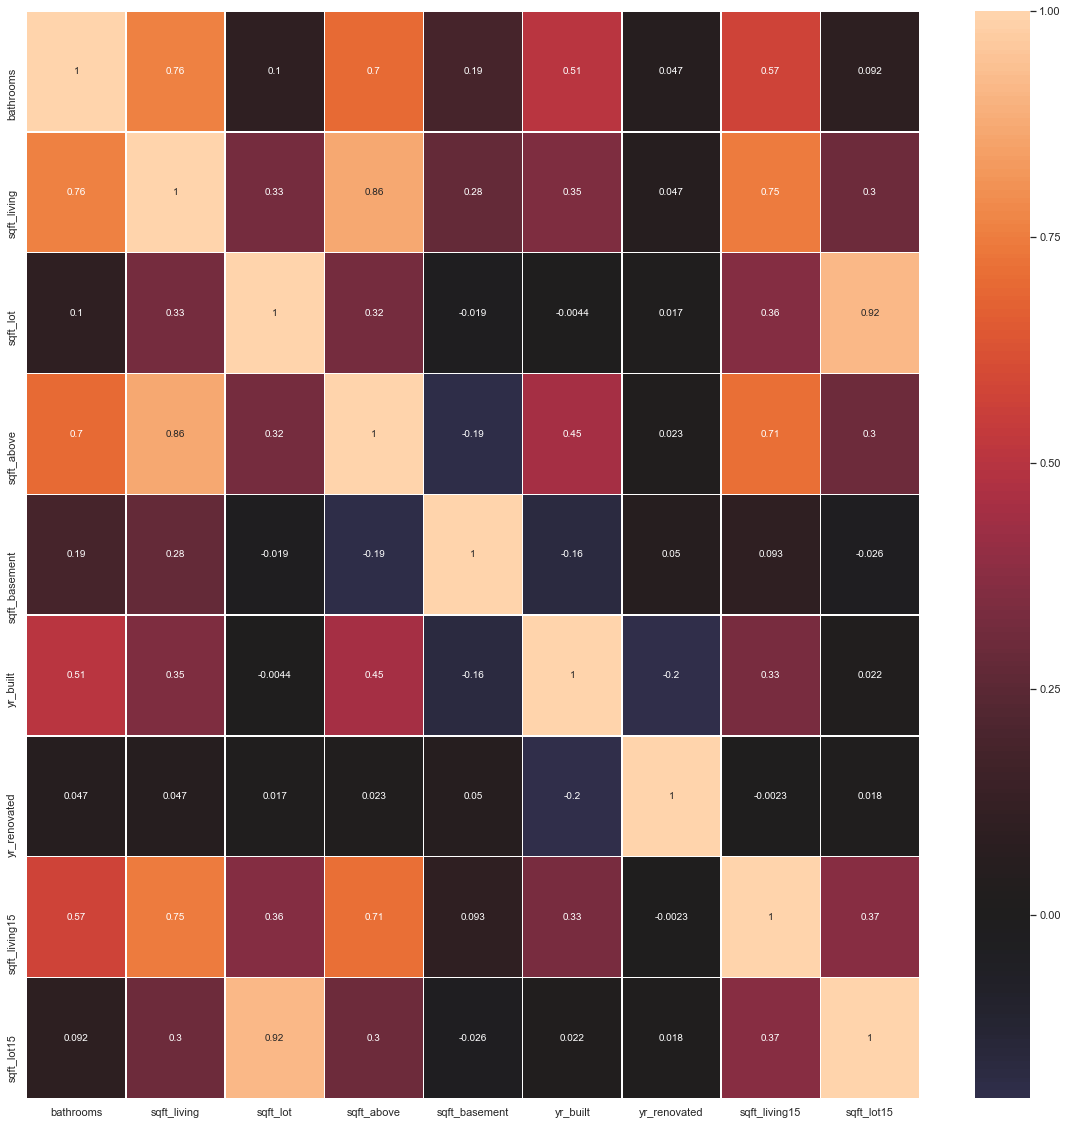

In [49]:
# df_target = df_no_outliers.loc['price']
df_heatmap=df.drop(['price','zipcode', 'lat', 'long'],axis=1)
plt.figure(figsize=(20,20))
ax=sns.heatmap(df_heatmap.corr(), center=0, linewidths=.5,annot=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [50]:
df_heatmap.corr() > 0.75


,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bathrooms,True,True,False,False,False,False,False,False,False
sqft_living,True,True,False,True,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False,True
sqft_above,False,True,False,True,False,False,False,False,False
sqft_basement,False,False,False,False,True,False,False,False,False
yr_built,False,False,False,False,False,True,False,False,False
yr_renovated,False,False,False,False,False,False,True,False,False
sqft_living15,False,False,False,False,False,False,False,True,False
sqft_lot15,False,False,True,False,False,False,False,False,True


# Modeling the data

## Baseline Model 

In [51]:
outcome = 'price'
x_cols = [ 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10',
       'bedrooms_11', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0',
       'floors_3_5', 'waterfront_1_0', 'view_1_0', 'view_2_0', 'view_3_0',
       'view_4_0', 'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122',
       'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155',
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98188', 'zipcode_98198', 'zipcode_98199','zipcode_98014']


In [52]:
# df_feats.columns = [col.replace('.', '_', inplace=True) for col in df_feats.columns]
# df_feats.columns = [col.replace(' ', '_', inplace=True) for col in df_feats.columns]
df_feats.columns = df_feats.columns.str.replace(r"[.]", "_")

In [53]:
df_feats.columns[:50]

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10',
       'bedrooms_11', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0',
       'floors_3_5', 'waterfront_1_0', 'view_1_0', 'view_2_0', 'view_3_0',
       'view_4_0', 'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007'],
      dtype='object')

In [54]:
df_feats.columns[50:]

Index(['zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122',
       'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
       'zipcode_98144', '

In [55]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_feats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1481.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:16:58   Log-Likelihood:                 6593.9
No. Observations:               21597   AIC:                        -1.296e+04
Df Residuals:                   21484   BIC:                        -1.206e+04
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.6438      0.183     69.166      0.000      12.286      13.002
bathrooms          0.0293      0.002     12.826      0.000       0.025       0.034
sqft_living        0.0992      0.006     16.566      0.000       0.087       0.111
sqft_lot           0.0647      0.003     19.853      0.000       0.058       0.071
sqft_above         0.0817      0.006     13.779      0.000       0.070       0.093
sqft_basement      0.0134      0.003      4.586      0.000       0.008       0.019
yr_built          -0.0031      0.002     -1.323      0.186      -0.008       0.001
yr_renovated       0.0125      0.001      9.527      0.000       0.010       0.015
sqft_living15      0.0485      0.002     22.106      0.000       0.044       0.053
sqft_lot15        -0.0172      0.003     -5.327      0.000      -0.024      -0.011
bedrooms_2        -0.0161      0.014     -1.176      0.240      -0.043       0.011
bedrooms_3        -0.0397      0.014     -2.883      0.004      -0.067      -0.013
bedrooms_4        -0.0421      0.014     -2.968      0.003      -0.070      -0.014
bedrooms_5        -0.0604      0.015     -4.041      0.000      -0.090      -0.031
bedrooms_6        -0.0930      0.018     -5.123      0.000      -0.129      -0.057
bedrooms_7        -0.2041      0.033     -6.234      0.000      -0.268      -0.140
bedrooms_8        -0.1220      0.052     -2.336      0.020      -0.224      -0.020
bedrooms_9        -0.2575      0.075     -3.424      0.001      -0.405      -0.110
bedrooms_10       -0.2770      0.105     -2.650      0.008      -0.482      -0.072
bedrooms_11        0.0438      0.180      0.243      0.808      -0.309       0.396
floors_1_5         0.0035      0.005      0.688      0.492      -0.006       0.013
floors_2_0        -0.0142      0.004     -3.292      0.001      -0.023      -0.006
floors_2_5         0.0049      0.015      0.330      0.742      -0.024       0.034
floors_3_0        -0.0821      0.010     -8.630      0.000      -0.101      -0.063
floors_3_5        -0.0601      0.068     -0.878      0.380      -0.194       0.074
waterfront_1_0     0.4415      0.018     23.926      0.000       0.405       0.478
view_1_0           0.1116      0.010     10.950      0.000       0.092       0.132
view_2_0           0.1023      0.006     16.447      0.000       0.090       0.114
view_3_0           0.1746      0.008     20.638      0.000       0.158       0.191
view_4_0           0.2913      0.013     22.753      0.000       0.266       0.316
condition_2        0.1551      0.036      4.289      0.000       0.084       0.226
condition_3        0.2884      0.034      8.567      0.000       0.222       0.354
condition_4        0.3286      0.034      9.756      0.000       0.263       0.395
condition_5        0.3947      0.034     11.644      0.000       0.328       0.461
grade_4     

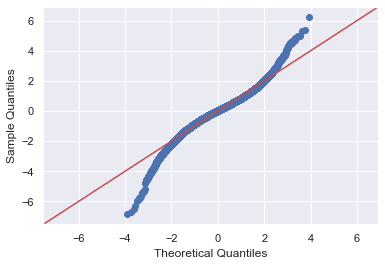

In [56]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

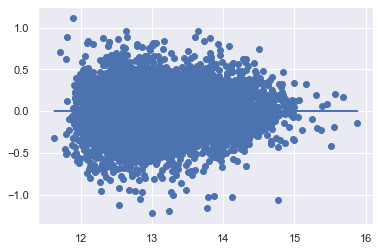

In [57]:
plt.scatter(model.predict(df_feats[x_cols]), model.resid)
plt.plot(model.predict(df_feats[x_cols]), [0 for i in range(len(df_feats))])
plt.show()

In [58]:
X = df_feats[x_cols]

In [59]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bathrooms', 3.5316747808283333),
 ('sqft_living', 24.23659567270521),
 ('sqft_lot', 7.175221738707819),
 ('sqft_above', 23.775037045056983),
 ('sqft_basement', 5.759277176214353),
 ('yr_built', 3.670031754990115),
 ('yr_renovated', 1.1565771249025418),
 ('sqft_living15', 3.250357387408571),
 ('sqft_lot15', 7.033375956736909),
 ('bedrooms_2', 16.112579160821305),
 ('bedrooms_3', 58.32552530772867),
 ('bedrooms_4', 43.256667677512),
 ('bedrooms_5', 11.206263430267292),
 ('bedrooms_6', 2.802674187058921),
 ('bedrooms_7', 1.2741542447414778),
 ('bedrooms_8', 1.1100890293100745),
 ('bedrooms_9', 1.0612971716352404),
 ('bedrooms_10', 1.0256882090920467),
 ('bedrooms_11', 1.011953323842375),
 ('floors_1_5', 1.5410345557330258),
 ('floors_2_0', 4.798393682859523),
 ('floors_2_5', 1.135993676519303),
 ('floors_3_0', 1.7282090797961178),
 ('floors_3_5', 1.0242509241800242),
 ('waterfront_1_0', 1.5553599184364917),
 ('view_1_0', 1.0721412402861943),
 ('view_2_0', 1.158103057804861),
 ('view_3_

## K-fold Cross Validation for Model 1

In [60]:
X = df_feats[x_cols]
y = df_feats['price']

linreg = LinearRegression()
cvs_10=cross_val_score(linreg, X, y, cv=10)
cvs_10_res_mean = round(np.mean(cvs_10),5)
cv_10_res_std = round(np.std(cvs_10),5)
print(f'Mean cross validation score for 10 fold is {cvs_10_res_mean}')
print(f'Standard deviation of the score is {cv_10_res_std}')


Mean cross validation score for 10 fold is -3.4158858549238196e+20
Standard deviation of the score is 1.0107713930389565e+21


## Perform stepwise selection

In [61]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [62]:
X = df_feats[x_cols]
# X = df_feats.drop('price', axis=1)
y = df_feats['price']

result = stepwise_selection(X, y, verbose = False)
print('resulting features:')
print(result)

resulting features:
['sqft_living', 'sqft_living15', 'zipcode_98004', 'zipcode_98023', 'view_4_0', 'grade_7', 'grade_6', 'grade_8', 'grade_5', 'grade_9', 'zipcode_98003', 'zipcode_98092', 'zipcode_98038', 'zipcode_98002', 'zipcode_98032', 'bathrooms', 'zipcode_98039', 'zipcode_98040', 'zipcode_98033', 'zipcode_98112', 'zipcode_98115', 'zipcode_98103', 'zipcode_98117', 'zipcode_98199', 'zipcode_98105', 'zipcode_98119', 'zipcode_98107', 'zipcode_98109', 'waterfront_1_0', 'zipcode_98116', 'zipcode_98122', 'zipcode_98102', 'zipcode_98006', 'zipcode_98052', 'zipcode_98136', 'zipcode_98144', 'sqft_lot', 'zipcode_98008', 'zipcode_98005', 'grade_4', 'zipcode_98053', 'view_3_0', 'zipcode_98029', 'zipcode_98126', 'zipcode_98125', 'zipcode_98034', 'zipcode_98177', 'zipcode_98007', 'condition_5', 'zipcode_98074', 'zipcode_98075', 'grade_10', 'zipcode_98027', 'view_2_0', 'sqft_above', 'zipcode_98133', 'zipcode_98118', 'zipcode_98072', 'zipcode_98155', 'condition_4', 'condition_3', 'view_1_0', 'zipc

In [63]:
a=['grade_6', 'sqft_living', 'grade_7', 'grade_8', 'grade_5', 'zipcode_98004', 'zipcode_98023', 'grade_9', 'waterfront_1_0', 'sqft_living15', 'zipcode_98003', 'zipcode_98092', 'zipcode_98038', 'zipcode_98002', 'zipcode_98032', 'zipcode_98039', 'bathrooms', 'zipcode_98033', 'zipcode_98040', 'zipcode_98112', 'zipcode_98115', 'zipcode_98117', 'zipcode_98103', 'zipcode_98199', 'zipcode_98105', 'zipcode_98119', 'zipcode_98107', 'zipcode_98116', 'zipcode_98109', 'zipcode_98122', 'zipcode_98102', 'view_4_0', 'zipcode_98006', 'zipcode_98052', 'zipcode_98136', 'zipcode_98144', 'sqft_lot', 'zipcode_98008', 'zipcode_98005', 'grade_4', 'zipcode_98053', 'view_3_0', 'zipcode_98029', 'zipcode_98126', 'zipcode_98125', 'zipcode_98034', 'zipcode_98177', 'zipcode_98007', 'condition_5', 'zipcode_98074', 'zipcode_98075', 'grade_10', 'zipcode_98027', 'view_2_0', 'sqft_above', 'zipcode_98133', 'zipcode_98118', 'zipcode_98072', 'zipcode_98155', 'condition_4', 'condition_3', 'view_1_0', 'zipcode_98011', 'zipcode_98065', 'zipcode_98028', 'zipcode_98077', 'zipcode_98106', 'yr_renovated', 'zipcode_98108', 'zipcode_98059', 'zipcode_98056', 'zipcode_98024', 'grade_11', 'floors_3_0', 'zipcode_98166', 'zipcode_98146', 'zipcode_98045', 'zipcode_98019', 'zipcode_98014', 'zipcode_98070', 'zipcode_98010', 'zipcode_98058', 'zipcode_98178', 'zipcode_98055', 'sqft_basement', 'sqft_lot15', 'bedrooms_7', 'zipcode_98148', 'grade_13', 'bedrooms_2', 'condition_2', 'floors_2_0', 'bedrooms_6', 'zipcode_98188', 'zipcode_98168', 'bedrooms_5', 'bedrooms_9']

In [64]:
len(a)

97

In [65]:
b=['grade_7', 'sqft_living', 'zipcode_98004', 'waterfront_1_0', 'zipcode_98039', 'zipcode_98112', 'grade_13', 'grade_12', 'grade_11', 'grade_10', 'grade_6', 'zipcode_98040', 'grade_9', 'zipcode_98033', 'zipcode_98023', 'view_4_0', 'zipcode_98105', 'zipcode_98119', 'zipcode_98199', 'zipcode_98103', 'zipcode_98115', 'zipcode_98117', 'zipcode_98109', 'zipcode_98107', 'zipcode_98102', 'zipcode_98122', 'view_3_0', 'zipcode_98116', 'zipcode_98052', 'zipcode_98144', 'zipcode_98006', 'zipcode_98008', 'zipcode_98005', 'zipcode_98053', 'zipcode_98034', 'zipcode_98136', 'zipcode_98029', 'zipcode_98092', 'zipcode_98125', 'zipcode_98177', 'condition_5', 'zipcode_98007', 'zipcode_98126', 'zipcode_98074', 'zipcode_98075', 'zipcode_98027', 'zipcode_98133', 'zipcode_98118', 'view_2_0', 'zipcode_98072', 'zipcode_98155', 'sqft_above', 'view_1_0', 'yr_renovated', 'zipcode_98028', 'sqft_lot', 'zipcode_98106', 'zipcode_98011', 'condition_4', 'sqft_living15', 'bedrooms_3', 'zipcode_98108', 'floors_3_0', 'floors_2_0', 'bathrooms', 'zipcode_98146', 'zipcode_98056', 'zipcode_98077', 'zipcode_98024', 'zipcode_98065', 'zipcode_98059', 'zipcode_98045', 'zipcode_98019', 'bedrooms_2', 'zipcode_98014', 'zipcode_98166', 'bedrooms_7', 'zipcode_98168', 'floors_2_5', 'yr_built', 'bedrooms_9', 'zipcode_98038', 'zipcode_98055', 'zipcode_98058', 'bedrooms_10', 'zipcode_98010', 'zipcode_98148', 'sqft_lot15', 'zipcode_98178']

In [66]:
len(b)

89

In [67]:
print(a)

['grade_6', 'sqft_living', 'grade_7', 'grade_8', 'grade_5', 'zipcode_98004', 'zipcode_98023', 'grade_9', 'waterfront_1_0', 'sqft_living15', 'zipcode_98003', 'zipcode_98092', 'zipcode_98038', 'zipcode_98002', 'zipcode_98032', 'zipcode_98039', 'bathrooms', 'zipcode_98033', 'zipcode_98040', 'zipcode_98112', 'zipcode_98115', 'zipcode_98117', 'zipcode_98103', 'zipcode_98199', 'zipcode_98105', 'zipcode_98119', 'zipcode_98107', 'zipcode_98116', 'zipcode_98109', 'zipcode_98122', 'zipcode_98102', 'view_4_0', 'zipcode_98006', 'zipcode_98052', 'zipcode_98136', 'zipcode_98144', 'sqft_lot', 'zipcode_98008', 'zipcode_98005', 'grade_4', 'zipcode_98053', 'view_3_0', 'zipcode_98029', 'zipcode_98126', 'zipcode_98125', 'zipcode_98034', 'zipcode_98177', 'zipcode_98007', 'condition_5', 'zipcode_98074', 'zipcode_98075', 'grade_10', 'zipcode_98027', 'view_2_0', 'sqft_above', 'zipcode_98133', 'zipcode_98118', 'zipcode_98072', 'zipcode_98155', 'condition_4', 'condition_3', 'view_1_0', 'zipcode_98011', 'zipcode

In [68]:
len(x_cols)

112

In [69]:
len(x_cols)

112

## Model Refinement I

In [70]:
outcome = 'price'
x_cols = ['grade_6', 'sqft_living', 'grade_7', 'grade_8', 'grade_5', 'zipcode_98004', 'zipcode_98023', 'grade_9', 'waterfront_1_0', 'sqft_living15', 'zipcode_98003', 'zipcode_98092', 'zipcode_98038', 'zipcode_98002', 'zipcode_98032', 'zipcode_98039', 'bathrooms', 'zipcode_98033', 'zipcode_98040', 'zipcode_98112', 'zipcode_98115', 'zipcode_98117', 'zipcode_98103', 'zipcode_98199', 'zipcode_98105', 'zipcode_98119', 'zipcode_98107', 'zipcode_98116', 'zipcode_98109', 'zipcode_98122', 'zipcode_98102', 'view_4_0', 'zipcode_98006', 'zipcode_98052', 'zipcode_98136', 'zipcode_98144', 'sqft_lot', 'zipcode_98008', 'zipcode_98005', 'grade_4', 'zipcode_98053', 'view_3_0', 'zipcode_98029', 'zipcode_98126', 'zipcode_98125', 'zipcode_98034', 'zipcode_98177', 'zipcode_98007', 'condition_5', 'zipcode_98074', 'zipcode_98075', 'grade_10', 'zipcode_98027', 'view_2_0', 'sqft_above', 'zipcode_98133', 'zipcode_98118', 'zipcode_98072', 'zipcode_98155', 'condition_4', 'condition_3', 'view_1_0', 'zipcode_98011', 'zipcode_98065', 'zipcode_98028', 'zipcode_98077', 'zipcode_98106', 'yr_renovated', 'zipcode_98108', 'zipcode_98059', 'zipcode_98056', 'zipcode_98024', 'grade_11', 'floors_3_0', 'zipcode_98166', 'zipcode_98146', 'zipcode_98045', 'zipcode_98019', 'zipcode_98014', 'zipcode_98070', 'zipcode_98010', 'zipcode_98058', 'zipcode_98178', 'zipcode_98055', 'sqft_basement', 'sqft_lot15', 'bedrooms_7', 'zipcode_98148', 'grade_13', 'bedrooms_2', 'condition_2', 'floors_2_0', 'bedrooms_6', 'zipcode_98188', 'zipcode_98168', 'bedrooms_5', 'bedrooms_9']


In [71]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_feats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1706.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:22:34   Log-Likelihood:                 6562.9
No. Observations:               21597   AIC:                        -1.293e+04
Df Residuals:                   21499   BIC:                        -1.215e+04
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.7567      0.040    320.598      0.000      12.679      12.835
grade_6           -0.5914      0.021    -27.557      0.000      -0.633      -0.549
sqft_living        0.0967      0.006     16.542      0.000       0.085       0.108
grade_7           -0.5242      0.021    -25.459      0.000      -0.565      -0.484
grade_8           -0.4429      0.020    -22.037      0.000      -0.482      -0.403
grade_5           -0.6566      0.024    -26.912      0.000      -0.704      -0.609
zipcode_98004      1.0764      0.011     96.776      0.000       1.055       1.098
zipcode_98023     -0.0720      0.009     -7.973      0.000      -0.090      -0.054
grade_9           -0.3282      0.020    -16.510      0.000      -0.367      -0.289
waterfront_1_0     0.4447      0.018     24.101      0.000       0.409       0.481
sqft_living15      0.0493      0.002     22.565      0.000       0.045       0.054
zipcode_98003     -0.0282      0.011     -2.457      0.014      -0.051      -0.006
zipcode_98092     -0.0319      0.010     -3.052      0.002      -0.052      -0.011
zipcode_98038      0.1165      0.009     13.697      0.000       0.100       0.133
zipcode_98002     -0.0516      0.013     -3.839      0.000      -0.078      -0.025
zipcode_98032     -0.0632      0.017     -3.819      0.000      -0.096      -0.031
zipcode_98039      1.2397      0.026     47.686      0.000       1.189       1.291
bathrooms          0.0281      0.002     12.844      0.000       0.024       0.032
zipcode_98033      0.7400      0.010     76.971      0.000       0.721       0.759
zipcode_98040      0.8291      0.012     70.258      0.000       0.806       0.852
zipcode_98112      1.0368      0.012     86.047      0.000       1.013       1.060
zipcode_98115      0.8075      0.009     92.464      0.000       0.790       0.825
zipcode_98117      0.8135      0.009     90.732      0.000       0.796       0.831
zipcode_98103      0.8373      0.009     93.647      0.000       0.820       0.855
zipcode_98199      0.8412      0.011     75.091      0.000       0.819       0.863
zipcode_98105      0.9357      0.013     72.989      0.000       0.911       0.961
zipcode_98119      0.9767      0.014     68.960      0.000       0.949       1.004
zipcode_98107      0.8608      0.012     70.909      0.000       0.837       0.885
zipcode_98116      0.7517      0.011     68.469      0.000       0.730       0.773
zipcode_98109      0.9945      0.018     55.575      0.000       0.959       1.030
zipcode_98122      0.8107      0.012     69.674      0.000       0.788       0.833
zipcode_98102      0.9644      0.018     52.444      0.000       0.928       1.000
view_4_0           0.2927      0.013     22.879      0.000       0.268       0.318
zipcode_98006      0.5927      0.009     63.533      0.000       0.574       0.611
zipcode_9805

In [72]:
X = df_feats[x_cols]

In [73]:
X.head()

,grade_6,sqft_living,grade_7,grade_8,grade_5,zipcode_98004,zipcode_98023,grade_9,waterfront_1_0,sqft_living15,...,zipcode_98148,grade_13,bedrooms_2,condition_2,floors_2_0,bedrooms_6,zipcode_98188,zipcode_98168,bedrooms_5,bedrooms_9
0,0,-1.125564,1,0,0,0,0,0,0,-1.035420,...,0,0,0,0,0,0,0,0,0,0
1,0,0.709416,1,0,0,0,0,0,0,-0.326861,...,0,0,0,0,1,0,0,0,0,0
2,1,-2.131418,0,0,0,0,0,0,0,1.126525,...,0,0,1,0,0,0,0,0,0,0
3,0,0.070561,1,0,0,0,0,0,0,-0.990188,...,0,0,0,0,0,0,0,0,0,0
4,0,-0.292847,0,1,0,0,0,0,0,-0.134305,...,0,0,0,0,0,0,0,0,0,0


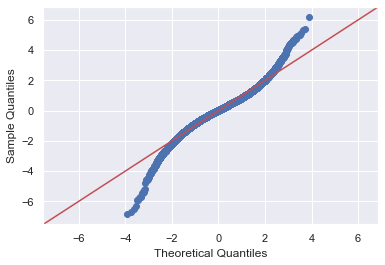

In [74]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

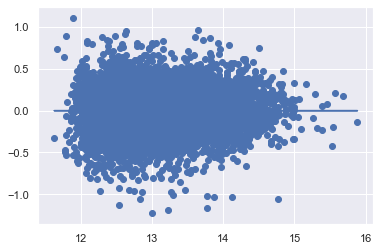

In [75]:
plt.scatter(model.predict(df_feats[x_cols]), model.resid)
plt.plot(model.predict(df_feats[x_cols]), [0 for i in range(len(df_feats))])

In [76]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('grade_6', 21.56754492356327),
 ('sqft_living', 23.03078456845798),
 ('grade_7', 86.78262613179798),
 ('grade_8', 56.233168984432446),
 ('grade_5', 3.403071109170188),
 ('zipcode_98004', 1.2160935824982597),
 ('zipcode_98023', 1.2654287454895916),
 ('grade_9', 24.109114642696152),
 ('waterfront_1_0', 1.5518501498802344),
 ('sqft_living15', 3.2046237472130428),
 ('zipcode_98003', 1.1474520407467141),
 ('zipcode_98092', 1.1915335070130468),
 ('zipcode_98038', 1.3289317625611068),
 ('zipcode_98002', 1.119631562163368),
 ('zipcode_98032', 1.069150426649071),
 ('zipcode_98039', 1.05238926044522),
 ('bathrooms', 3.224814546155024),
 ('zipcode_98033', 1.2400175905941604),
 ('zipcode_98040', 1.2212433556411937),
 ('zipcode_98112', 1.211805533678935),
 ('zipcode_98115', 1.379780099183949),
 ('zipcode_98117', 1.3780376783839945),
 ('zipcode_98103', 1.4916783375755027),
 ('zipcode_98199', 1.2365569897423474),
 ('zipcode_98105', 1.1709556752824748),
 ('zipcode_98119', 1.1490037633887533),
 ('zip

## Cross Validation

In [77]:
linreg = LinearRegression()
cvs_10=cross_val_score(linreg, X, y, cv=10)
cvs_10_res_mean = round(np.mean(cvs_10),5)
cv_10_res_std = round(np.std(cvs_10),5)
print(f'Mean cross validation score for 10 fold is {cvs_10_res_mean}')
print(f'Standard deviation of the score is {cv_10_res_std}')

Mean cross validation score for 10 fold is 0.88222
Standard deviation of the score is 0.00334


In [78]:
cvs_10

array([0.88689884, 0.88516799, 0.87867757, 0.88039985, 0.87608299,
       0.88048454, 0.88307061, 0.88686374, 0.8833788 , 0.8811993 ])

cvs_10_res_mean

In [79]:
cvs_10_res_mean

0.88222

In [80]:
cv_10_res_std

0.00334

##  Location! Location! Location!

In [81]:
income_df=df.copy()

In [82]:
from uszipcode import SearchEngine, Zipcode


In [83]:
search = SearchEngine(simple_zipcode=False)

In [84]:
zipcode = search.by_zipcode("98040")
zipcode.median_household_income

126359

In [85]:
def zco(x):
    income = search.by_zipcode(x)
    
    return income.median_household_income if income else x
   

In [86]:
income_df['income'] = income_df['zipcode'].astype(int).astype(str).apply(zco)

In [87]:
income_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,income
0,12.309987,3,-1.451039,-1.125564,-0.388490,1.0,0.0,0.0,3,7,-0.753624,-0.785188,-0.537412,-0.188883,98178,47.5112,-122.257,-1.035420,-0.395502,58707
1,13.195616,3,0.174482,0.709416,-0.113302,2.0,0.0,0.0,3,7,0.672625,1.112322,-0.674329,5.292283,98125,47.7210,-122.319,-0.326861,-0.024341,53044
2,12.100718,2,-1.451039,-2.131418,0.244426,1.0,0.0,0.0,3,6,-1.752585,-0.785188,-1.293945,-0.188883,98028,47.7379,-122.233,1.126525,0.041983,82448
3,13.311331,4,1.149794,0.070561,-0.523969,1.0,0.0,0.0,5,7,-1.026820,1.372094,-0.196342,-0.188883,98136,47.5208,-122.393,-0.990188,-0.545897,84344
4,13.142168,3,-0.150622,-0.292847,0.008081,1.0,0.0,0.0,3,8,0.073385,-0.785188,0.547945,-0.188883,98074,47.6168,-122.045,-0.134305,-0.046448,143686


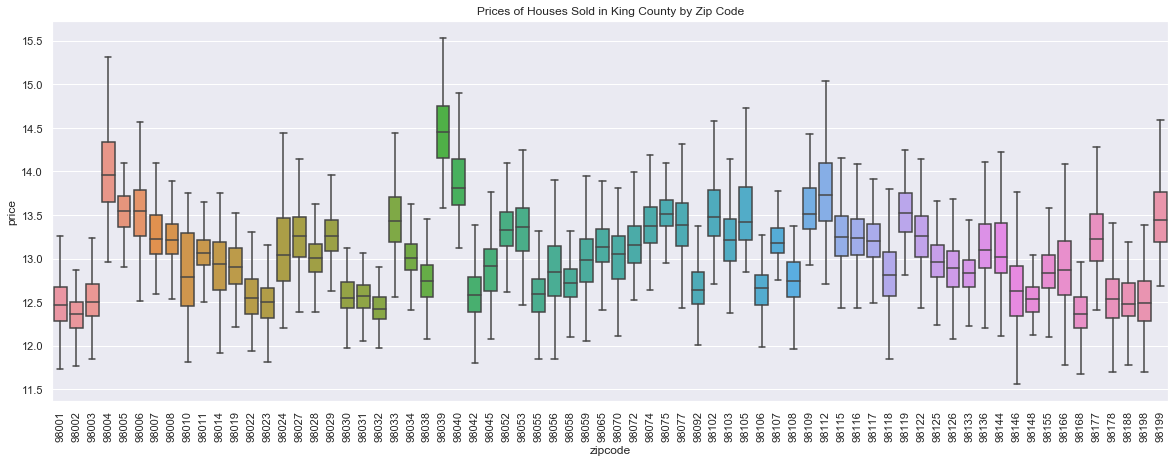

In [88]:
fig = plt.figure(figsize = (20,7))
fig = sns.boxplot(x='zipcode', y='price', data=income_df, showfliers = False)
plt.title('Prices of Houses Sold in King County by Zip Code')
# plt.xlabel("Zip Code")
plt.xticks(rotation=90)
# plt.ylabel('Sale Price, $')
plt.show()


https://www.zillow.com/bellevue-wa-98004/

https://www.zillow.com/mercer-island-wa-98040/

https://www.zillow.com/medina-wa-98039/

https://www.zillow.com/seattle-wa-98112/